# Exploring distribution bootstrap

- I compare stacking using bootstrap (1000 replicas or samples), and stacking without it (assuming no measurement error).
- I also plot the distribution of weights from the stacking procedure, so that to examine the variability of models' performance by sample.


In [5]:
# libraries

options(repr.plot.width=6, repr.plot.height=4)
library(data.table)
library(ggplot2)
library(patchwork)
library(rlist)

# Read results from list and create clean dataframe

In [7]:
# heavy file (around 1GB)
w = readRDS('../lstat/output/results_shifts_1900.rds')
t = unlist(w, recursive=FALSE)

In [8]:
# models' weights
result1 = list.filter(t, .name == 'result1')
wt = data.table(do.call(rbind, result1))
setnames(wt, names(wt), paste0('m', 1:4))

In [18]:
# shifts and predictions
result2 = list.filter(t, .name == 'result2')
dt = rbindlist(result2, idcol=TRUE)

# Weight plots

- There is some variability

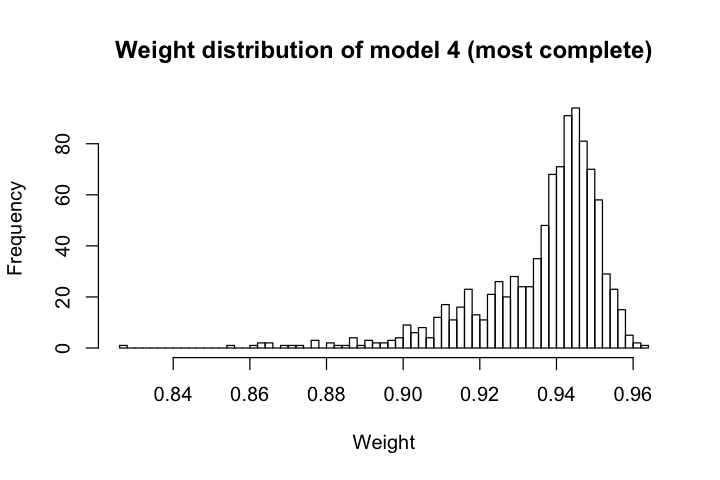

In [11]:
hist(wt$m4, breaks = 50,
     main='Weight distribution of model 4 (most complete)',
     xlab='Weight')

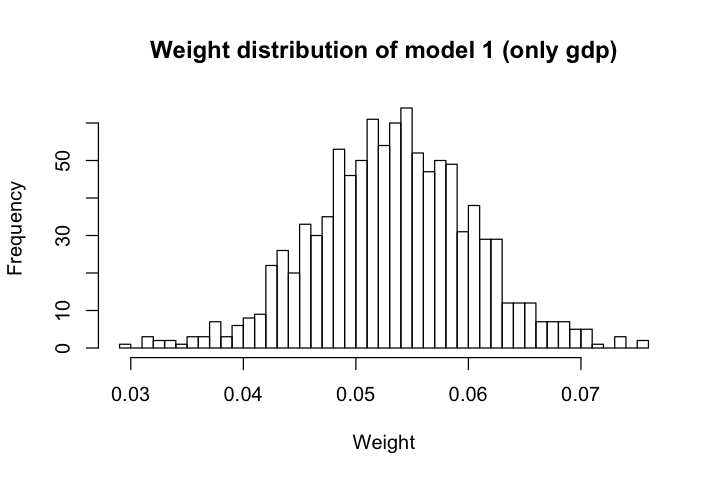

In [12]:
hist(wt$m1, breaks = 50,
     main='Weight distribution of model 1 (only gdp)',
     xlab='Weight')

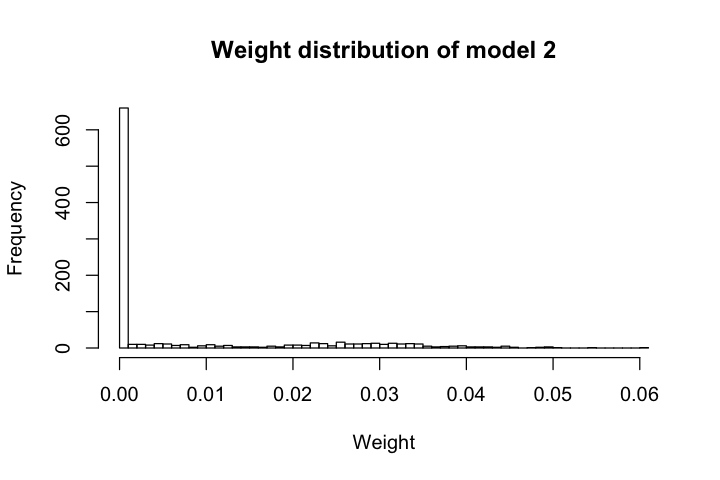

In [13]:
hist(wt$m2, breaks = 50,
     main='Weight distribution of model 2',
     xlab='Weight')

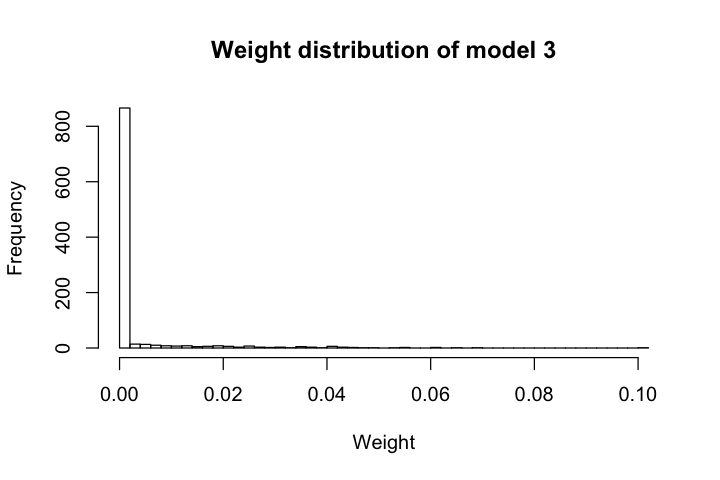

In [14]:
hist(wt$m3, breaks = 50,
     main='Weight distribution of model 3',
     xlab='Weight')

# Shift estimates

In [19]:
# read data
a = fread('../lstat/output/shift_1900_stacking.csv')
# b = fread('../lstat/output/bs_shift_1900.csv')
# c = fread('../lstat/output/bs_shift_1900_uniform.csv')

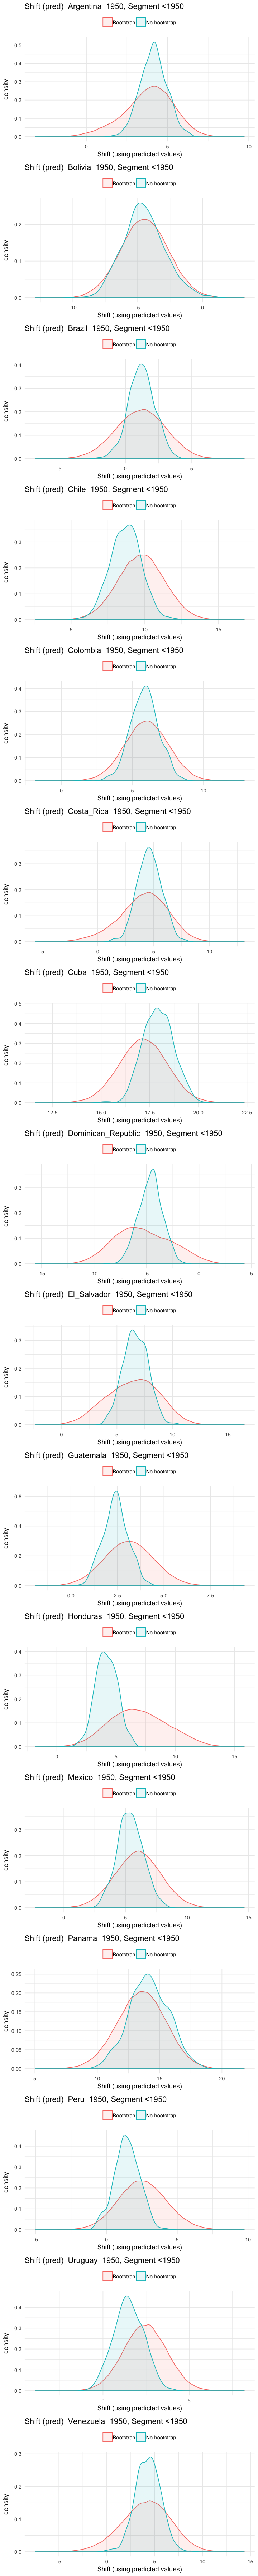

In [20]:
countries = unique(a[year<1950, ctry])

plots = list()

for (i in countries) {

    sa = a[ctry==i & segment=='1950' & year==1950]
    sa[, estimate := 'No bootstrap']  
    
    sb = dt[ctry==i & segment=='1950' & year==1950]
    sb[, estimate := 'Bootstrap']

    df = rbind(sa, sb, fill=TRUE)
    
    plots[[i]] = ggplot(df, aes(shift_pred, fill = estimate, colour = estimate)) +
        geom_density(alpha = 0.1) + 
        labs(title=paste('Shift (pred) ', i, ' 1950, Segment <1950'), x='Shift (using predicted values)') + 
        theme_minimal() + 
        theme(legend.position="top", legend.title=element_blank())
    
}

options(repr.plot.width=6, repr.plot.height=60)
wrap_plots(plots, ncol=1)